In [3]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


In [4]:
#Load dataset
df = pd.read_csv('../data/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
#Check data overview
df.info()
df.describe()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:
#Clean data. Drop customerID (not useful for modelling)
df.drop('customerID', axis=1, inplace=True)


In [7]:
#Convert TotalCharges to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].isnull().sum()  # Check how many NaNs were created


np.int64(11)

In [8]:
#Handle NaNs (drop them)
df = df.dropna()


Text(0.5, 1.0, 'Churn Distribution')

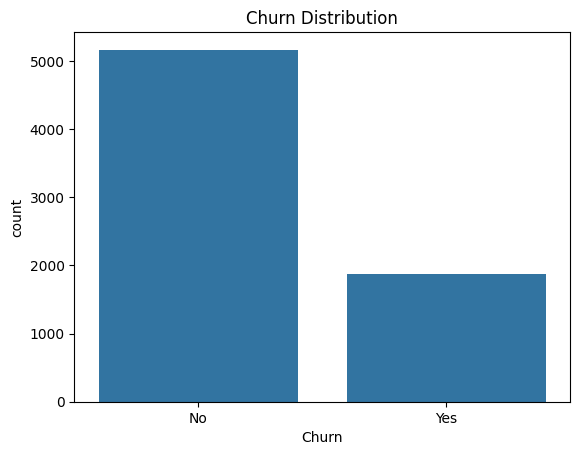

In [9]:
#Visualize target distribution
sns.countplot(x='Churn', data=df)
plt.title('Churn Distribution')


In [10]:
#Save cleaned Dataset
df.to_csv('../data/cleaned_churn.csv', index=False)


In [12]:
from src.preprocessing import load_data, build_preprocessing_pipeline, split_and_preprocess

df = load_data("data/cleaned_churn.csv")
X, y, preprocessor = build_preprocessing_pipeline(df)
X_train, X_test, y_train, y_test = split_and_preprocess(X, y, preprocessor)

ModuleNotFoundError: No module named 'src'

In [5]:
from src.preprocessing import load_data, build_preprocessing_pipeline, split_and_preprocess
from src.model import (
    apply_smote,
    train_logistic_regression,
    train_random_forest,
    evaluate_model
)

df = load_data("data/cleaned_churn.csv")
X, y, preprocessor = build_preprocessing_pipeline(df)
X_train, X_test, y_train, y_test = split_and_preprocess(X, y, preprocessor)

# Apply SMOTE
X_train_balanced, y_train_balanced = apply_smote(X_train, y_train)

# Train and evaluate models
logreg_tuned = train_logistic_regression(X_train_balanced, y_train_balanced)
evaluate_model(logreg_tuned, X_test, y_test, "Tuned Logistic Regression")

rf_tuned = train_random_forest(X_train_balanced, y_train_balanced)
evaluate_model(rf_tuned, X_test, y_test, "Tuned Random Forest")



Tuned Logistic Regression Accuracy: 0.7328
              precision    recall  f1-score   support

           0       0.90      0.72      0.80      1033
           1       0.50      0.78      0.61       374

    accuracy                           0.73      1407
   macro avg       0.70      0.75      0.70      1407
weighted avg       0.79      0.73      0.75      1407

Fitting 3 folds for each of 108 candidates, totalling 324 fits

Tuned Random Forest Accuracy: 0.7754
              precision    recall  f1-score   support

           0       0.85      0.84      0.85      1033
           1       0.58      0.59      0.58       374

    accuracy                           0.78      1407
   macro avg       0.71      0.72      0.71      1407
weighted avg       0.78      0.78      0.78      1407



0.775408670931059

In [6]:
from src.preprocessing import load_data, build_preprocessing_pipeline, split_and_preprocess
from src.model import apply_smote, train_xgboost_model, evaluate_model

# Apply SMOTE again if needed
X_train_balanced, y_train_balanced = apply_smote(X_train, y_train)

xgb_model = train_xgboost_model(X_train_balanced, y_train_balanced)
evaluate_model(xgb_model, X_test, y_test, "Tuned XGBoost")


Fitting 3 folds for each of 36 candidates, totalling 108 fits


C:\Users\kiero\Documents\churn-prediction\venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [21:11:46] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



Tuned XGBoost Accuracy: 0.7704
              precision    recall  f1-score   support

           0       0.87      0.81      0.84      1033
           1       0.56      0.65      0.60       374

    accuracy                           0.77      1407
   macro avg       0.71      0.73      0.72      1407
weighted avg       0.78      0.77      0.78      1407



0.7704335465529495